# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# **Read the data**

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

# **Analyze train data**

In [3]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
105,106,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S
793,794,0,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S


In [4]:
print(train.isnull().sum())
print('.'*30)
print(f'Number of observations: {train.shape[0]}')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
..............................
Number of observations: 891


**There are many missing values in *Age* which I'll try to estimate later. There are 891 rows and *Embarked* has 2 missing values. Dropping them should not casue any problem. On the other hand *Cabin* has 687 missing values. So I'll drop the whole column.**

In [5]:
train.dropna(axis=0, subset=['Embarked'], inplace=True)
train.drop(axis=1, columns=['Cabin'], inplace=True)

print(train.isnull().sum())
print('.'*30)
print(f'Number of observations: {train.shape[0]}')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64
..............................
Number of observations: 889


**Also, it seems like *PassengerId* will not predict *Survival*. Also, *Ticket* does not look useful, so let's drop it.**

In [6]:
train.drop(axis=1, columns=['PassengerId', 'Ticket'], inplace=True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## Pclass

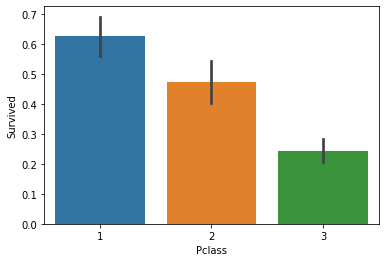

,Pclass,Survived
0,1,0.626168
1,2,0.472826
2,3,0.242363


In [7]:
sns.barplot(x="Pclass", y="Survived", data=train)
plt.show();

train[['Pclass', 'Survived']].groupby('Pclass',as_index=False).mean()

**Looks like high class passengers had greater survival rate.**

## Sex

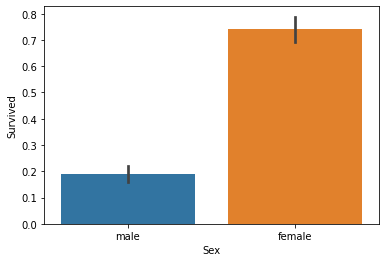

,Sex,Survived
0,female,0.740385
1,male,0.188908


In [8]:
sns.barplot(x="Sex", y="Survived", data=train)
plt.show();

train[['Sex', 'Survived']].groupby('Sex',as_index=False).mean()

**Female passengers' survival rate is far greater than male passengers' survival rate.**

**Make Sex binary -> 'male':0, 'female':1**

In [9]:
train.loc[train['Sex']=='male','Sex']=0
train.loc[train['Sex']=='female','Sex']=1

## SibSp

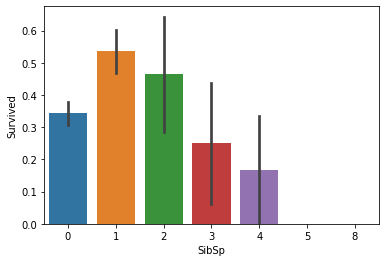

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.343234
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [10]:
sns.barplot(x="SibSp", y="Survived", data=train)
plt.show();

train[['SibSp', 'Survived']].groupby('SibSp',as_index=False).mean().sort_values(by='Survived', ascending=False)

**Passengers with no *SibSp* have lower rate of survival compared those with 1 or 2 *SibSp*, though higher than those with 3 or more *SibSp*. Passengers with *SibSp* of 1 have highest survival rate and it declines with increasing number of *SibSp*.**

**I'll change this feature: 0 if without *SibSp*, 1 if with *SibSp* is 1 or more.**

In [11]:
train.loc[train['SibSp']==0,'WithSibSp'] = 0
train.loc[train['SibSp']>0,'WithSibSp'] = 1
train['WithSibSp']=train['WithSibSp'].astype(int)
train[['WithSibSp', 'Survived']].groupby(['WithSibSp'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,WithSibSp,Survived
1,1,0.466431
0,0,0.343234


**Now, survival rate is higher when with sibling or spose aboard.**

In [12]:
#drop SibSp
train = train.drop('SibSp', axis=1)

## Parch

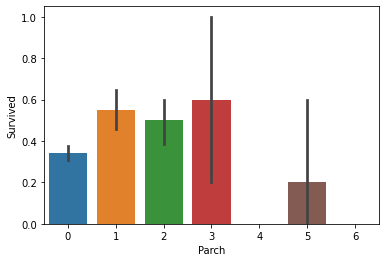

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.341716
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [13]:
sns.barplot(x='Parch', y='Survived', data=train)
plt.show();

train[['Parch', 'Survived']].groupby('Parch',as_index=False).mean().sort_values(by='Survived', ascending=False)

**Passengers without any parent or child aboard are more likely to survive than those with 4 or more Parch and less likely than those with 1-3 Parch aboard.**

**I'll change this feature: 0 if without *Parch*, 1 if with *Parch* is 1 or more.**

In [14]:
train.loc[train['Parch']==0,'WithParch'] = 0
train.loc[train['Parch']>0,'WithParch'] = 1
train['WithParch']=train['WithParch'].astype(int)
train[['WithParch', 'Survived']].groupby(['WithParch'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,WithParch,Survived
1,1,0.511737
0,0,0.341716


**Now, survival rate is higher when with parent or child aboard.**

In [15]:
#drop Parch
train = train.drop('Parch', axis=1)

## Fare

In [16]:
train['FareGroups'] = pd.qcut(train['Fare'], 4)
train[['FareGroups', 'Survived']].groupby('FareGroups').mean()

,Survived
FareGroups,
"(-0.001, 7.896]",0.197309
"(7.896, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.577273


**Looks like when *Fare* increases survival rate increases. Let's convert *Fare* to categorical variable.**

In [17]:
train.loc[train['Fare'] <= 7.896, 'Fare'] = 0
train.loc[(train['Fare'] > 7.896) & (train['Fare'] <= 14.454), 'Fare'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare'] = 2
train.loc[train['Fare'] > 31, 'Fare'] = 3

In [18]:
train = train.drop(['FareGroups'], axis=1)
train['Fare'] = train['Fare'].astype(int)
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,WithSibSp,WithParch
0,0,3,"Braund, Mr. Owen Harris",0,22.0,0,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,3,C,1,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,1,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,3,S,1,0
4,0,3,"Allen, Mr. William Henry",0,35.0,1,S,0,0


## Age

#### First extract honorifics from *Name* and use them to estimate missing values in *Age*

**Extract Honorifics and find mean of age in each Honorific group**

In [19]:
train['Honorific'] = train['Name'].str.extract(' (\w+)\.', expand=False)
honorifics = train[['Honorific', 'Age']].groupby('Honorific').Age.mean().astype(int).to_dict()
honorifics

{'Capt': 70,
 'Col': 58,
 'Countess': 33,
 'Don': 40,
 'Dr': 42,
 'Jonkheer': 38,
 'Lady': 48,
 'Major': 48,
 'Master': 4,
 'Miss': 21,
 'Mlle': 24,
 'Mme': 24,
 'Mr': 32,
 'Mrs': 35,
 'Ms': 28,
 'Rev': 43,
 'Sir': 49}

**Fill NaN ages with mean age of appropriate Hinorific group**

In [20]:
for k in honorifics.keys():
    train.Age[(train['Age'].isna())&(train['Honorific']==k)] = honorifics[k]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Drop *Name* and *Honorific***

In [21]:
train = train.drop(['Name', 'Honorific'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,WithSibSp,WithParch
0,0,3,0,22.0,0,S,1,0
1,1,1,1,38.0,3,C,1,0
2,1,3,1,26.0,1,S,0,0
3,1,1,1,35.0,3,S,1,0
4,0,3,0,35.0,1,S,0,0


**Create age groups**

In [22]:
train['AgeGroups'] = pd.qcut(train['Age'], 5)
train[['AgeGroups', 'Survived']].groupby('AgeGroups').mean()

,Survived
AgeGroups,
"(0.419, 20.0]",0.459016
"(20.0, 26.0]",0.397727
"(26.0, 32.0]",0.272358
"(32.0, 38.0]",0.504673
"(38.0, 80.0]",0.367232


In [23]:
train.loc[train['Age'] <= 20.0, 'Age'] = 0
train.loc[(train['Age'] > 20.0) & (train['Age'] <= 26.0), 'Age'] = 1
train.loc[(train['Age'] > 26.0) & (train['Age'] <= 32.0), 'Age'] = 2
train.loc[(train['Age'] > 32.0) & (train['Age'] <= 38.0), 'Age'] = 3
train.loc[train['Age'] > 38.0, 'Age'] = 4
train['Age'] = train['Age'].astype(int)
train=train.drop('AgeGroups', axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,WithSibSp,WithParch
0,0,3,0,1,0,S,1,0
1,1,1,1,3,3,C,1,0
2,1,3,1,1,1,S,0,0
3,1,1,1,3,3,S,1,0
4,0,3,0,3,1,S,0,0


## Embarked

In [24]:
train[['Embarked', 'Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


**Among embarkation ports Cherbourg has greatest survival rate, followed by Queenstown and Southampton**

**Convert port abbreviations into numeric values -> C:0, Q:1, S:2**

In [25]:
train.loc[train['Embarked']=='C', 'Embarked'] = 0
train.loc[train['Embarked']=='Q', 'Embarked'] = 1
train.loc[train['Embarked']=='S', 'Embarked'] = 2
train.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,WithSibSp,WithParch
0,0,3,0,1,0,2,1,0
1,1,1,1,3,3,0,1,0
2,1,3,1,1,1,2,0,0
3,1,1,1,3,3,2,1,0
4,0,3,0,3,1,2,0,0


# **Now, let's take care of test data**

In [26]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Drop *Ticket* and *Cabin*

In [27]:
test = test.drop(['Ticket','Cabin'], axis=1)

### Modify *Sex* -> 'male': 0, 'female': 1

In [28]:
test.loc[test['Sex']=='male','Sex']=0
test.loc[test['Sex']=='female','Sex']=1

### Modify *Age*

In [29]:
test['Honorific'] = test['Name'].str.extract(' (\w+)\.', expand=False)
test[['Honorific', 'Age']].groupby('Honorific').mean()

,Age
Honorific,
Col,50.000000
Dona,39.000000
Dr,53.000000
Master,7.406471
Miss,21.774844
Mr,32.000000
Mrs,38.903226
Ms,NaN
Rev,35.500000


**There is only one *Ms* and I'll estimate it based on class and gender**

In [30]:
test[test['Honorific']=='Ms']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Honorific
88,980,3,"O'Donoghue, Ms. Bridget",1,NaN,0,0,7.75,Q,Ms


In [31]:
test[['Pclass', 'Sex', 'Age']].groupby(['Sex', 'Pclass']).mean()

Age
Sex Pclass           
0   1       40.520000
    2       30.940678
    3       24.525104
1   1       41.333333
    2       24.376552
    3       23.073400

In [32]:
test.loc[test['Honorific']=='Ms', 'Age'] = 23.0

In [33]:
#Extract Honorifics and find mean of age in each Honorific group
honorifics = test[['Honorific', 'Age']].groupby('Honorific').Age.mean().astype(int).to_dict()

# #Fill NaN ages with mean age of appropriate Hinorific group
for k in honorifics.keys():
    test.Age[(test['Age'].isna())&(test['Honorific']==k)] = honorifics[k]
    
# #Drop Name and Honorific
test = test.drop(['Name', 'Honorific'], axis=1)

#Turn Age into numeric categories
test.loc[test['Age'] <= 20.0, 'Age'] = 0
test.loc[(test['Age'] > 20.0) & (test['Age'] <= 26.0), 'Age'] = 1
test.loc[(test['Age'] > 26.0) & (test['Age'] <= 32.0), 'Age'] = 2
test.loc[(test['Age'] > 32.0) & (test['Age'] <= 38.0), 'Age'] = 3
test.loc[test['Age'] > 38.0, 'Age'] = 4
test['Age'] = test['Age'].astype(int)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
honorifics

{'Col': 50,
 'Dona': 39,
 'Dr': 53,
 'Master': 7,
 'Miss': 21,
 'Mr': 32,
 'Mrs': 38,
 'Ms': 23,
 'Rev': 35}

### Change *SibSp* feature: 0 if without SibSp, 1 if with SibSp is 1 or more.

In [35]:
test.loc[test['SibSp']==0,'WithSibSp'] = 0
test.loc[test['SibSp']>0,'WithSibSp'] = 1
test['WithSibSp']=test['WithSibSp'].astype(int)

#drop SibSp
test = test.drop('SibSp', axis=1)

### Change *Parch* feature: 0 if without *Parch*, 1 if with *Parch* is 1 or more.


In [36]:
test.loc[test['Parch']==0,'WithParch'] = 0
test.loc[test['Parch']>0,'WithParch'] = 1
test['WithParch']=test['WithParch'].astype(int)

#drop Parch
test = test.drop('Parch', axis=1)

### Modify *Fare*

In [37]:
test[test['Fare'].isna()]

,PassengerId,Pclass,Sex,Age,Fare,Embarked,WithSibSp,WithParch
152,1044,3,0,4,NaN,S,0,0


**Estimate *Fare* based on mean of 3rd class passenger fares and *Age***

In [38]:
test[['Pclass', 'Fare', 'Age']].groupby(['Age', 'Pclass']).mean()

Fare
Age Pclass            
0   1       111.415000
    2        30.809585
    3        15.600260
1   1        69.060083
    2        19.613542
    3        10.639581
2   1        87.690420
    2        17.820654
    3        10.829873
3   1        99.109931
    2        22.058333
    3        14.782768
4   1        99.297514
    2        21.991226
    3        14.988542

In [39]:
test.loc[test['Fare'].isna(), 'Fare']= int(14.988542)

In [40]:
test.loc[test['Fare'] <= 7.896, 'Fare'] = 0
test.loc[(test['Fare'] > 7.896) & (test['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare'] = 2
test.loc[test['Fare'] > 31, 'Fare'] = 3

test['Fare'] = test['Fare'].astype(int)

### Convert port abbreviations into numeric values -> C:0, Q:1, S:2


In [41]:
test.loc[test['Embarked']=='C', 'Embarked'] = 0
test.loc[test['Embarked']=='Q', 'Embarked'] = 1
test.loc[test['Embarked']=='S', 'Embarked'] = 2

In [42]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,WithSibSp,WithParch
0,892,3,0,3,0,1,0,0
1,893,3,1,4,0,2,1,0
2,894,2,0,4,1,1,0,0
3,895,3,0,2,1,2,0,0
4,896,3,1,1,1,2,1,1


# **Prediction time**

### **Logistic Regression**

In [43]:
from sklearn.linear_model import LogisticRegression

y = train["Survived"]
features = train.columns.values[1:]
X = train[features]

logreg = LogisticRegression()
logreg.fit(X, y)
test_data = test.iloc[:,1:]
predictions = logreg.predict(test_data)


# **Create Submission File**

In [44]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
